In [59]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot  as plt

In [60]:
data = pd.read_csv('all_stocks_5yr.csv', index_col = 'date')

In [10]:
data

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...
2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS


In [12]:
data_piv = data.pivot(columns='Name', values = 'close')

In [13]:
data_piv

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
2018-02-02,71.25,52.10,113.93,160.5000,115.17,96.02,61.69,156.90,195.64,89.11,...,38.25,70.64,84.53,60.06,31.63,75.66,82.63,125.79,54.15,76.78
2018-02-05,68.22,49.76,109.86,156.4900,109.51,91.90,58.73,151.83,190.27,85.40,...,37.68,66.97,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83


In [21]:
data_piv.columns[(data_piv.isna().sum() > 0)]

Index(['ALLE', 'APTV', 'BHF', 'BHGE', 'BMY', 'CFG', 'COTY', 'CSRA', 'DHR',
       'DWDP', 'DXC', 'ES', 'EVHC', 'FOX', 'FOXA', 'FTV', 'GOOG', 'HLT', 'HPE',
       'HPQ', 'ICE', 'INFO', 'IQV', 'KHC', 'NAVI', 'NWS', 'NWSA', 'O', 'ORCL',
       'PYPL', 'QRVO', 'SYF', 'UA', 'WLTW', 'WRK'],
      dtype='object', name='Name')

In [31]:
data_clean = data_piv.dropna(axis = 1)

In [32]:
#Hacemos los datos estacionarios /independientes en el tiempo
#Con el logaritmo hacemos la varianza estacionaria 
#Con el diff hacemos que sean independientes en el tiempo

data_final = np.log(data_clean).diff().dropna()

In [49]:
#Vamos con el PCA
pca = PCA(n_components=460)

In [50]:
components_data = pca.fit_transform(data_final)

In [51]:
components_data.shape

(1258, 460)

In [52]:
# matriz de componentes principales
pca.components_

array([[-0.05232729, -0.06186165, -0.04063233, ..., -0.03840767,
        -0.06137394, -0.03614861],
       [ 0.01615031,  0.05793807,  0.02323425, ...,  0.01989292,
        -0.02357013,  0.02627565],
       [ 0.01679125,  0.06719862, -0.00540659, ..., -0.00906355,
         0.09792316,  0.00683618],
       ...,
       [ 0.01693294,  0.00960805,  0.00390925, ...,  0.0078876 ,
         0.04705821,  0.01140818],
       [ 0.00299643, -0.00818633,  0.01697953, ...,  0.00876193,
         0.09538032, -0.00665413],
       [ 0.0183969 , -0.01056086, -0.00760888, ...,  0.0015138 ,
         0.06959043,  0.01532576]])

In [55]:
pca.components_[0]

array([-0.05232729, -0.06186165, -0.04063233, -0.03571688, -0.04426799,
       -0.03117885, -0.04195437, -0.04102843, -0.047447  , -0.0514796 ,
       -0.04417477, -0.03948561, -0.05234323, -0.05956226, -0.01909001,
       -0.01763452, -0.04453116, -0.04095821, -0.03780522, -0.04424965,
       -0.04895044, -0.02683818, -0.0390766 , -0.03516752, -0.05631016,
       -0.05207146, -0.05213661, -0.05341233, -0.03223088, -0.06063033,
       -0.05645073, -0.07126477, -0.04835647, -0.07189058, -0.04974139,
       -0.06675347, -0.03231203, -0.04507903, -0.05577531, -0.04411406,
       -0.03774045, -0.03791058, -0.05263937, -0.06862596, -0.07233256,
       -0.04368479, -0.04413568, -0.02800064, -0.06879084, -0.04502456,
       -0.02284859, -0.06030392, -0.04397272, -0.01694404, -0.04160925,
       -0.05339543, -0.03012542, -0.04443161, -0.06177178, -0.03088524,
       -0.04750409, -0.04940925, -0.03221069, -0.06314231, -0.03103669,
       -0.05670225, -0.05364647, -0.06049054, -0.03820449, -0.03

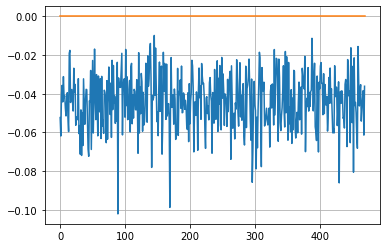

In [67]:
#primer componente
plt.plot(pca.components_[0])
plt.plot([0.0] * pca.components_[0].shape[0])
plt.grid()

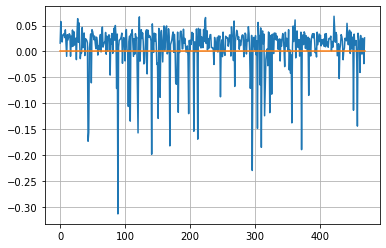

In [66]:
#segundo
plt.plot(pca.components_[1])
plt.plot([0.0] * pca.components_[1].shape[0])
plt.grid()

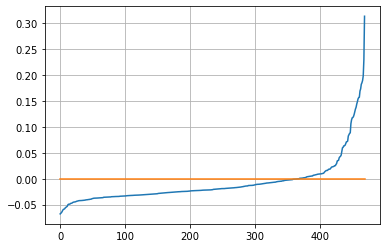

In [71]:
#Segundo componente rankeado

componente2 = - pca.components_[1]
componente2_ranked = np.sort(componente2)
plt.plot(componente2_ranked)
plt.plot([0.0] * pca.components_[0].shape[0])
plt.grid()

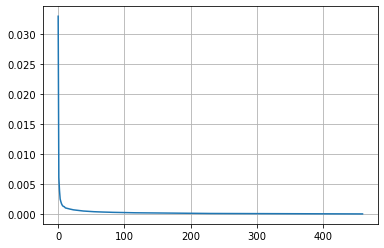

In [75]:
plt.plot(pca.explained_variance_)
plt.grid()

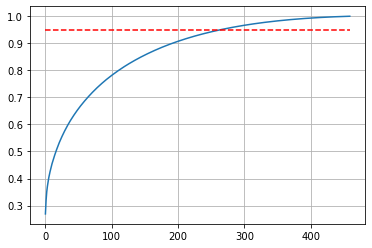

In [78]:
# porentaje de varianza explicada por los n primeros componentes principales
plt.plot(pca.explained_variance_ratio_.cumsum())

#threshold en 95%
plt.plot(np.ones(460) * 0.95, 'r--')
plt.grid()

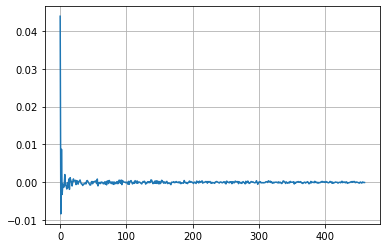

In [82]:
plt.plot(-pca.components_.mean(axis=1))
plt.grid()

In [83]:
data_final.columns

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Name', length=470)

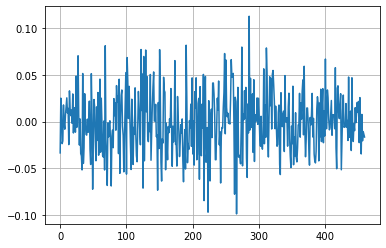

In [86]:
#Estimar volatilidad de cartera de dos activos, apple + abc equal weighted
plt.plot(0.5 * pca.components_[:,3] + 0.5 * pca.components_[:,5])
plt.grid()

In [89]:
component_weights = 0.5 * pca.components_[:,3] + 0.5 * pca.components_[:,5]
#Multiplicamos la exposicion a cada componente por la varianza de cada componente
component_weights.dot(pca.explained_variance_)

-0.0009791037267562809